## 1. Build Regression Model with TF DenseFeatures

### Overview
- Used preprocessed dataset from TF regression tutorial https://www.tensorflow.org/tutorials/keras/regression
- Used TF feature column API and TF DenseFeatures instead of the methods used in tutorial

### Dataset Preprocessing From Tutorial

In [2]:
# Importing Required Libraries
# - matplotlib.pyplot as plt: Used for creating static, animated, and interactive visualizations in Python. The 'plt' alias is a common convention.
# - numpy as np: Fundamental package for scientific computing with Python. Provides support for arrays, mathematical functions, and more. The 'np' alias is standard.
# - pandas as pd: Powerful data analysis and manipulation library. The 'pd' alias is commonly used for concise code.
# - seaborn as sns: Statistical data visualization library built on top of matplotlib. The 'sns' alias is standard and provides a high-level interface for drawing attractive statistical graphics.
# - tensorflow as tf: Open-source platform for machine learning and deep learning. The 'tf' alias is widely used for brevity.
#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
# ## Downloading the Auto MPG Dataset with TensorFlow Keras Utilities
# - **Library Used:** `tf.keras.utils.get_file` from TensorFlow Keras is used to download files from a URL and cache them locally.
# - **Dataset:** The "Auto MPG" dataset from the UCI Machine Learning Repository contains information about various cars, including their fuel efficiency (miles per gallon), and is commonly used for regression tasks.
# - **Code Explanation:**
#   - `tf.keras.utils.get_file(fname, origin)`: Downloads a file from the specified `origin` URL and saves it with the name `fname` in the local Keras datasets directory.
#     - `fname`: The name to save the file as locally ("auto-mpg.data").
#     - `origin`: The URL to download the file from.
#
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

  32768/Unknown 0s 2us/step

In [5]:
# ## Loading and Preparing the Auto MPG Dataset
# - **Library Used:** pandas (`pd.read_csv`) is used for data loading and manipulation.
# - **column_names:** Defines the expected column names for the dataset, including 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', and 'Origin'.
# - **pd.read_csv:** Loads the dataset from the path specified by `dataset_path`.
#     - `names=column_names`: Assigns the specified column names to the DataFrame.
#     - `na_values="?"`: Treats any "?" in the data as missing values (NaN).
#     - `comment='\t'`: Ignores lines starting with a tab character.
#     - `sep=" "`: Uses space as the delimiter between columns.
#     - `skipinitialspace=True`: Ignores extra spaces after the delimiter.
# - **raw_dataset.columns:** Renames the columns to ensure 'Model Year' is changed to 'ModelYear' for consistency.
# - **dataset = raw_dataset.copy():** Creates a copy of the raw dataset for further processing.
# - **dataset.tail():** Displays the last five rows of the dataset for inspection.
#
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
raw_dataset.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'ModelYear', 'Origin']
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
# ## Checking for Missing Values in the Dataset
# - **dataset.isna().sum():** This line checks for missing values in each column of the dataset.
#     - `isna()`: Returns a DataFrame of the same shape as `dataset`, with boolean values indicating whether each element is NaN (missing).
#     - `sum()`: Sums up the boolean values for each column, effectively counting the number of missing values per column.
# - This is a crucial step in data preprocessing to identify and handle missing data appropriately.

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [7]:
# ## Dropping Rows with Missing Values
# - **dataset.dropna():** This line removes any rows in the dataset that contain missing values (NaN).
#     - `dropna()`: By default, this method removes any row with at least one NaN value.
# - This step is essential to ensure that the dataset is clean and ready for analysis or modeling, as many algorithms cannot handle missing values directly.
# - After this operation, the dataset will only contain rows with complete data.

dataset = dataset.dropna()

In [8]:
# ## Converting the 'Origin' Column to Categorical Data
# - **dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'}):** This line transforms the numerical values in the 'Origin' column into categorical string labels.
#     - `map()`: This method is used to map values from one set to another based on a given mapping dictionary.
#     - `{1: 'USA', 2: 'Europe', 3: 'Japan'}`: This dictionary specifies that:
#         - 1 should be replaced with 'USA'
#         - 2 should be replaced with 'Europe'
#         - 3 should be replaced with 'Japan'
# - This conversion is useful for better interpretability and analysis, as categorical data can provide more meaningful insights compared to numerical codes.

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [9]:
# ## Splitting the Dataset into Training and Testing Sets
# - **Library Used:** pandas (`DataFrame.sample`, `DataFrame.drop`)
# - **Explanation:**
#   - `dataset.sample(frac=0.8, random_state=0)`: Randomly selects 80% of the rows from the `dataset` DataFrame to create the training set.
#       - `frac=0.8`: Specifies the fraction of rows to return (80%).
#       - `random_state=0`: Ensures reproducibility by setting a seed for the random number generator.
#   - `dataset.drop(train_dataset.index)`: Removes the rows selected for training from the original dataset to create the test set, ensuring no overlap between training and testing data.

#split 80 20 train test split
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [10]:
# ## Displaying the Columns of the Training Dataset
# - **Library Used:** pandas (`DataFrame.columns`)
# - **Explanation:**
#   - `train_dataset.columns`: This attribute returns the column labels of the DataFrame `train_dataset` as an Index object.
#   - **Purpose:** Useful for quickly inspecting the feature names present in the training dataset after preprocessing and splitting.
#
train_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'ModelYear', 'Origin'],
      dtype='object')

In [ ]:
# ## Displaying the First Few Rows of the Training Dataset
# - **Library Used:** pandas (`DataFrame.head`)
# - **Explanation:**
train_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
146,28.0,4,90.0,75.0,2125.0,14.5,74,USA
282,22.3,4,140.0,88.0,2890.0,17.3,79,USA
69,12.0,8,350.0,160.0,4456.0,13.5,72,USA
378,38.0,4,105.0,63.0,2125.0,14.7,82,USA
331,33.8,4,97.0,67.0,2145.0,18.0,80,Japan


In [12]:
# ## Extracting Labels from the Training Dataset
# - **Library Used:** pandas (`DataFrame['column']`)
# - **Explanation:**
#   - `train_dataset['MPG']`: Accesses the 'MPG' column from the `train_dataset` DataFrame, which contains the target variable (miles per gallon) for regression.
#   - This line assigns the extracted column to the variable `train_labels`, which will be used as the label vector for model training.
#   - **Key Parameters:** The column name `'MPG'` must match exactly with the DataFrame's column label.
#
train_labels = train_dataset['MPG']

In [ ]:
# ## Calculating and Displaying Training Data Statistics with pandas
# - **Library Used:** pandas (`DataFrame.describe`, `DataFrame.pop`, `DataFrame.transpose`)
# - **Code Explanation:**
#   - `train_dataset.describe()`: Computes summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for each column in the training dataset.
#   - `train_stats.pop("MPG")`: Removes the 'MPG' column from the statistics DataFrame, as it is the target variable and not a feature.
#   - `train_stats = train_stats.transpose()`: Transposes the DataFrame so that each feature becomes a row and each statistic becomes a column, making it easier to reference statistics by feature.
#   - `train_stats`: Displays the resulting DataFrame containing summary statistics for each feature in the training data.

train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
ModelYear,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [ ]:
# ## Defining Categorical and Numerical Feature Lists
# - **categorical_feature_list:** A list containing the names of categorical features in the dataset. In this case, it includes only the 'Origin' feature.
# - **numerical_feature_list:** A list containing the names of numerical features in the dataset. This list includes 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', and 'ModelYear'.
# - **Note:** The comment indicates that 'Model Year' and 'Cylinders' are treated as numerical features for this exercise, although they could be processed differently depending on the analysis or modeling approach.
#
categorical_feature_list = ['Origin']
# for the sake of this exercise treat Model Year and Cylinders as numerical but could process differently
numerical_feature_list = ['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'ModelYear']

In [15]:
# ## Normalizing Numerical Features
# - **Function Definition:** The `norm` function normalizes the input data `x` using the mean and standard deviation from the training statistics.
# - **Normalization Formula:** The normalization is performed using the formula: (x - mean) / std, where `mean` and `std` are obtained from `train_stats`.
# - **Applying Normalization:** The function is applied to both the training and testing datasets for the numerical features specified in `numerical_feature_list`.
# - **Result:** The normalized training and testing data are stored in `normed_train_data` and `normed_test_data`, respectively.
#

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset[numerical_feature_list])
normed_test_data = norm(test_dataset[numerical_feature_list])

In [ ]:
# ## Combining Normalized Numerical Features with Categorical Features
# - **pd.concat:** This function is used to concatenate two DataFrames along a specified axis.
# - **Parameters:**
norm_train_data = pd.concat([ train_dataset[categorical_feature_list + ['MPG']],  normed_train_data],
                            axis=1, sort=False)
norm_test_data = pd.concat([ test_dataset[categorical_feature_list + ['MPG']], normed_test_data], axis=1, sort=False)

In [17]:
# ## Saving the Normalized Datasets to CSV Files
# - **to_csv:** This method is used to save a DataFrame to a CSV file.
# - **Parameters:**
#   - `"mpg_train_data.csv"` and `"mpg_test_data.csv"`: The names of the output CSV files for the training and testing datasets, respectively.
#   - `index=False`: This parameter ensures that the row indices are not included in the CSV file.
# - **Purpose:** Saving the normalized datasets allows for easy access and use in future analyses or model training without needing to repeat the normalization process.

norm_train_data.to_csv("mpg_train_data.csv", index=False)
norm_test_data.to_csv("mpg_test_data.csv", index=False)

In [18]:
norm_train_data.head()

,Origin,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear
146,USA,28.0,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
282,USA,22.3,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
69,USA,12.0,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
378,USA,38.0,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
331,Japan,33.8,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971


### Load Preprocessed Dataset

- Use TF Dataset API and Feature Column APIs instead

In [19]:
# ## Loading the Saved Normalized Datasets from CSV Files
# - **pd.read_csv:** This function is used to read a CSV file and load it into a pandas DataFrame.
# - **Parameters:**
#   - `"mpg_train_data.csv"` and `"mpg_test_data.csv"`: The names of the CSV files to be read for the training and testing datasets, respectively.
# - **Purpose:** Loading the saved normalized datasets allows for verification of the saved data and further analysis or modeling.
#
train_data = pd.read_csv("mpg_train_data.csv" )
test_data = pd.read_csv("mpg_test_data.csv" )

In [ ]:
# Explanation of Code Block: Converting DataFrame to TensorFlow Dataset
# - **Function Definition:** The `df_to_dataset` function converts a pandas DataFrame into a TensorFlow Dataset, which is suitable for training machine learning models.
# - **Parameters:**
#adapted from https://www.tensorflow.org/tutorials/structured_data/feature_columns
def df_to_dataset(df, predictor,  batch_size=32):
    df = df.copy()
    labels = df.pop(predictor)
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)
    return ds

In [ ]:
# ## Creating TensorFlow Datasets for Training and Testing
# - **PREDICTOR_FIELD:** Specifies the target variable for prediction, which is 'MPG' (miles per gallon).
# - **batch_size:** Sets the number of samples per batch for training and testing datasets. Here, it is set to 128.
# - **df_to_dataset:** This function is called to convert the normalized training and testing DataFrames into TensorFlow Datasets.
#   - `train_ds`: The TensorFlow Dataset created from the training data.
#   - `test_ds`: The TensorFlow Dataset created from the testing data.

PREDICTOR_FIELD = 'MPG'
batch_size = 128
train_ds = df_to_dataset(train_data, PREDICTOR_FIELD, batch_size=batch_size)
test_ds = df_to_dataset(test_data, PREDICTOR_FIELD, batch_size=batch_size)

In [22]:
# ## Defining Feature Columns for Categorical and Numerical Features
# - **categorical_columns:** A list to hold TensorFlow feature columns for categorical features.
# - **numerical_columns:** A list to hold TensorFlow feature columns for numerical features.
# - **Categorical Features:**
#   - For each feature in `categorical_feature_list`, a `categorical_column_with_vocabulary_list` is created, specifying the possible values (vocabulary) for that feature.
#   - Each categorical column is then wrapped in an `indicator_column` to convert it into a one-hot encoded format.
# - **Numerical Features:**
#   - For each feature in `numerical_feature_list`, a `numeric_column` is created, which represents the feature as a continuous numerical value.
# - **feature_columns:** Combines both categorical and numerical feature columns into a single list for use in model training.

sample_batch = next(iter(train_ds))[0]
def demo(feature_column, example_batch):
    feature_layer = tf.keras.layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch))

### Convert Origin Categorical Feature to One Hot Encoded Feature

In [24]:
# ## Creating a One-Hot Encoded TensorFlow Feature Column for the 'Origin' Categorical Feature
# - **Library Used:** TensorFlow Feature Columns API (`tf.feature_column`)
# - **Explanation:**
#   - `tf.feature_column.categorical_column_with_vocabulary_list`: Creates a categorical feature column for the 'Origin' column, specifying the vocabulary (unique values) from the training data.
#       - `key="Origin"`: The name of the feature in the input data.
#       - `vocabulary_list=train_data['Origin'].unique()`: The list of unique values for the 'Origin' feature, ensuring all categories are included.
#   - `tf.feature_column.indicator_column`: Converts the categorical column into a one-hot encoded column, which is required for feeding categorical data into a neural network.
#       - `categorical_column`: The categorical column created in the previous step.
#
# only feature
v_list = tf.feature_column.categorical_column_with_vocabulary_list("Origin",
                                                            train_data['Origin'].unique())
one_hot_origin_feature = tf.feature_column.indicator_column(v_list)

In [31]:
# ## Modern Keras One-Hot Encoding for Categorical Features
# - **Library Used:** TensorFlow Keras Preprocessing Layers (`tf.keras.layers.StringLookup`, `tf.keras.layers.CategoryEncoding`)
# - **Purpose:** This block demonstrates how to one-hot encode the 'Origin' categorical feature using modern Keras preprocessing layers, which are recommended for new TensorFlow/Keras code.
# - **Line-by-Line Explanation:**
#   - `origin_lookup = tf.keras.layers.StringLookup(...)`: Creates a lookup layer that maps string values (e.g., 'USA', 'Japan', 'Europe') to integer indices. The `vocabulary` parameter is set to the unique values in the 'Origin' column of the training data, and `output_mode='int'` ensures integer output.
#   - `origin_onehot = tf.keras.layers.CategoryEncoding(...)`: Creates a one-hot encoding layer that converts integer indices to one-hot encoded vectors. The `num_tokens` parameter specifies the number of unique categories, and `output_mode="one_hot"` sets the output format.
#   - `demo_onehot(example_batch)`: A helper function that demonstrates the transformation. It first converts the 'Origin' strings to integer indices using `origin_lookup`, then applies `origin_onehot` to produce one-hot encoded vectors, and prints the result.
# - **Key Parameters:**
#   - `vocabulary` (in `StringLookup`): List of unique category values.
#   - `output_mode` (in both layers): Determines the output format ('int' for indices, 'one_hot' for one-hot vectors).
#   - `num_tokens` (in `CategoryEncoding`): Number of unique categories to encode.

#
# Modern Keras one-hot encoding for the 'Origin' categorical feature

import tensorflow as tf

# 1. Create a StringLookup layer for the Origin column
origin_lookup = tf.keras.layers.StringLookup(vocabulary=train_data['Origin'].unique(), output_mode='int')

# 2. Create a CategoryEncoding layer for one-hot encoding
origin_onehot = tf.keras.layers.CategoryEncoding(
    num_tokens=origin_lookup.vocabulary_size(), output_mode="one_hot"
)

def demo_onehot(example_batch):
    # example_batch['Origin'] is a tf.Tensor of shape (batch_size,)
    origin_int = origin_lookup(example_batch['Origin'])
    origin_1hot = origin_onehot(origin_int)
    print(origin_1hot)

print("Example categorical field: Origin (one-hot encoded)")
demo_onehot(sample_batch)


Example categorical field: Origin (one-hot encoded)
tf.Tensor(
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1.

### Create Numerical Features

NOTE: We do not use the normalizer function here because the dataset has already been normalized.

In [ ]:
# ## Function to Convert Numerical Features to TensorFlow Numeric Feature Columns
# - **Function Definition:** The `create_tf_numerical_feature_cols` function takes a list of numerical feature names and converts them into TensorFlow numeric feature columns.
# - **Parameters:**
#   - `numerical_col_list`: A list of strings representing the names of numerical features.
# - **Process:**
#convert numerical features, these features have already been normalized
def create_tf_numerical_feature_cols(numerical_col_list):
    tf_numeric_col_list = []
    for c in numerical_col_list:
        tf_numeric_feature = tf.feature_column.numeric_column(
                    key=c,  dtype=tf.float64)
        tf_numeric_col_list.append(tf_numeric_feature)
    return tf_numeric_col_list

In [34]:
# - **Return Value:** The function returns a list of TensorFlow numeric feature columns corresponding to the input numerical feature names.
tf_numerical_feature_list = create_tf_numerical_feature_cols(numerical_feature_list)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [35]:
tf_numerical_feature_list

[NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None)]

In [37]:
import tensorflow as tf

# Example for the first numerical feature
num_feature_name = numerical_feature_list[0]  # e.g., 'Cylinders'
normalizer = tf.keras.layers.Normalization(axis=None)
normalizer.adapt(train_data[[num_feature_name]])

def demo_numerical(example_batch):
    # example_batch[num_feature_name] is a tf.Tensor of shape (batch_size,)
    normed = normalizer(tf.cast(example_batch[num_feature_name], tf.float32))
    print(normed)

print(f"Example continuous field: {num_feature_name}")
demo_numerical(sample_batch)

UnboundLocalError: cannot access local variable 'input_shape' where it is not associated with a value

### Combine TF Features with DenseFeatures

In [38]:
feature_columns = [ one_hot_origin_feature ] + tf_numerical_feature_list

In [39]:
feature_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=('USA', 'Japan', 'Europe'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None)]

In [ ]:
# ## Creating a Keras Preprocessing Model for All Features
# - **Library Used:** TensorFlow Keras (`tf.keras`)
# - **Purpose:** This block demonstrates how to create a Keras model that preprocesses both numerical and categorical features, preparing them for input into a machine learning model.
# - **Line-by-Line Explanation:**
#   - `inputs = {}`: Initializes an empty dictionary to hold input layers for each feature.
#   - `for col in numerical_feature_list: ...`: Loops through each numerical feature and creates a Keras Input layer for it, specifying the shape and name.
#   - `inputs['Origin'] = tf.keras.Input(...)`: Creates an Input layer for the 'Origin' categorical feature, specifying that it is a string type.
#   - `numerical_inputs = [inputs[col] for col in numerical_feature_list]`: Collects all numerical input layers into a list.
#   - `numerical_concat = tf.keras.layers.Concatenate()(numerical_inputs)`: Concatenates all numerical input layers into a single tensor.
#   - `origin_lookup = tf.keras.layers.StringLookup(...)`: Creates a StringLookup layer to convert 'Origin' strings to integer indices.
#   - `origin_onehot = tf.keras.layers.CategoryEncoding(...)`: Creates a CategoryEncoding layer to one-hot encode the integer indices of 'Origin'.
#   - `origin_int = origin_lookup(inputs['Origin'])`: Applies the StringLookup layer to the 'Origin' input.
#   - `origin_encoded = origin_onehot(origin_int)`: Applies the CategoryEncoding layer to get the one-hot encoded representation of 'Origin'.
#   - `all_features = tf.keras.layers.Concatenate()([...])`: Concatenates the normalized numerical features and the one-hot encoded categorical features into a single tensor.
#   - `preprocessing_model = tf.keras.Model(...)`: Defines a Keras Model that takes the input layers and outputs the combined feature tensor.
## - **Return Value:** The `preprocessing_model` can be used as a preprocessing step before feeding data into a machine learning model.

import tensorflow as tf

# 1. Inputs
inputs = {}
for col in numerical_feature_list:
    inputs[col] = tf.keras.Input(shape=(1,), name=col)
inputs['Origin'] = tf.keras.Input(shape=(1,), dtype=tf.string, name='Origin')

# 2. Numerical features (already normalized in your data, so just concatenate)
numerical_inputs = [inputs[col] for col in numerical_feature_list]
numerical_concat = tf.keras.layers.Concatenate()(numerical_inputs)

# 3. Categorical feature: Origin
origin_lookup = tf.keras.layers.StringLookup(vocabulary=train_data['Origin'].unique(), output_mode='int')
origin_onehot = tf.keras.layers.CategoryEncoding(num_tokens=origin_lookup.vocabulary_size(), output_mode="one_hot")
origin_int = origin_lookup(inputs['Origin'])
origin_encoded = origin_onehot(origin_int)

# 4. Combine all features
all_features = tf.keras.layers.Concatenate()([numerical_concat, origin_encoded])

# 5. Use this as the input to your model
preprocessing_model = tf.keras.Model(inputs=inputs, outputs=all_features)

In [44]:
# ## Building a Keras Regression Model with DenseFeatures Layer
# - **Library Used:** TensorFlow Keras (`tf.keras`)
# - **Purpose:** This block defines a function to build a regression model using the Keras Sequential API, incorporating a DenseFeatures layer for feature input.
# - **Line-by-Line Explanation:**
#   - `def build_model(dense_feature_layer):`: Defines a function that takes a DenseFeatures layer as input.
#   - `tf.keras.Sequential([...])`: Creates a sequential model where layers are stacked in order.
#   - `dense_feature_layer`: The input layer that processes feature columns (categorical and numerical).
#   - `tf.keras.layers.Dense(64, activation='relu')`: Adds a dense (fully connected) layer with 64 units and ReLU activation for non-linearity.
#   - `tf.keras.layers.Dense(64, activation='relu')`: Adds another dense layer with 64 units and ReLU activation.
#   - `tf.keras.layers.Dense(1)`: Output layer with a single unit for regression prediction (no activation).
#   - `tf.keras.optimizers.RMSprop(0.001)`: Uses the RMSprop optimizer with a learning rate of 0.001.
#   - `model.compile(...)`: Compiles the model with mean squared error loss (`'mse'`), the specified optimizer, and metrics for mean absolute error (`'mae'`) and mean squared error (`'mse'`).
# - **Key Parameters:**
#   - `dense_feature_layer`: Handles input feature transformation.
#   - `units=64`: Number of neurons in each hidden layer.
#   - `activation='relu'`: Activation function for hidden layers.
#   - `loss='mse'`: Loss function for regression.
#   - `optimizer=optimizer`: Optimizer instance.
#   - `metrics=['mae', 'mse']`: Metrics to monitor during training.

# Use same architecture as example
def build_model(dense_feature_layer):
    model = tf.keras.Sequential([
    dense_feature_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])


    return model

In [48]:
# ## Building a Keras Functional API Regression Model with Preprocessing Layer
# - **Library Used:** TensorFlow Keras (`tf.keras`)
# - **Purpose:** This code block demonstrates how to build a regression model using the Keras Functional API, integrating a preprocessing model that combines both numerical and categorical features.
# - **Line-by-Line Explanation:**
#   - `inputs = preprocessing_model.input`: Retrieves the input layers from the preprocessing model, which are Keras Input layers for each feature.
#   - `x = preprocessing_model.output`: Gets the output tensor from the preprocessing model, which is the concatenated and preprocessed feature tensor.
#   - `x = tf.keras.layers.Dense(64, activation='relu')(x)`: Adds a dense (fully connected) layer with 64 units and ReLU activation to introduce non-linearity.
#   - `x = tf.keras.layers.Dense(64, activation='relu')(x)`: Adds another dense layer with 64 units and ReLU activation for deeper feature learning.
#   - `outputs = tf.keras.layers.Dense(1)(x)`: Adds an output layer with a single unit for regression prediction (no activation function).
#   - `model = tf.keras.Model(inputs=inputs, outputs=outputs)`: Defines the Keras model, specifying the input and output tensors.
#   - `model.compile(...)`: Compiles the model with mean squared error loss (`'mse'`), RMSprop optimizer, and metrics for mean absolute error (`'mae'`) and mean squared error (`'mse'`).
# - **Key Parameters:**
#   - `activation='relu'`: Activation function for hidden layers.
#   - `loss='mse'`: Loss function for regression tasks.
#   - `optimizer=tf.keras.optimizers.RMSprop(0.001)`: Optimizer with specified learning rate.
#   - `metrics=['mae', 'mse']`: Metrics to monitor during training.

inputs = preprocessing_model.input
x = preprocessing_model.output
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    metrics=['mae', 'mse']
)

In [49]:
# validation split

In [51]:
# ## Training the Keras Model with Early Stopping
# - **Library Used:** TensorFlow Keras (`tf.keras`)
# - **Purpose:** This code block trains the Keras model using the training dataset, with early stopping to prevent overfitting.
# - **Line-by-Line Explanation:**
#   - `EPOCHS = 2000`: Sets the maximum number of training epochs to 2000.
#   - `early_stop = tf.keras.callbacks.EarlyStopping(...)`: Creates an early stopping callback that monitors the mean squared error ('mse') and stops training if it does not improve for 10 consecutive epochs (patience=10).
#   - `model.fit(...)`: Trains the model using the training dataset (`train_ds`).
#       - `train_ds`: The TensorFlow Dataset containing training data.
#       - `callbacks=[early_stop]`: Includes the early stopping callback to monitor training.
#       - `epochs=EPOCHS`: Specifies the maximum number of epochs for training.
#       - `verbose=1`: Enables verbose output during training, showing progress for each epoch.
# - **Note:** No validation set is used in this training process, as indicated by the comment.

# No validation set b/c need to build separate TF dataset
EPOCHS = 2000
# Set to patience to 100 so it trains to end of epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=10)
history = model.fit(train_ds,   callbacks=[early_stop], epochs=EPOCHS,  verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2456 - mae: 1.7439 - mse: 6.2456
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2822 - mae: 1.7799 - mse: 6.2822
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0318 - mae: 1.7065 - mse: 6.0318
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9555 - mae: 1.7548 - mse: 5.9555
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3285 - mae: 1.6275 - mse: 5.3285
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3842 - mae: 1.7442 - mse: 6.3842
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6961 - mae: 1.7110 - mse: 5.6961
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2885 - mae: 1.8136 - mse: 6.2885
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4623 - mae: 1.7420 - mse: 6.4623
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7975 - mae: 1.6930 - mse: 5.7975
Epoch 11/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5321 - m

In [ ]:
# ## Evaluating the Keras Model on the Test Dataset
# - **Library Used:** TensorFlow Keras (`tf.keras`)
# - **Purpose:** This code block evaluates the trained Keras model on the test dataset to assess its performance.
# - **Line-by-Line Explanation:**
#   - `model.evaluate(test_ds, verbose=2)`: Evaluates the model using the test dataset (`test_ds`).
#       - `test_ds`: The TensorFlow Dataset containing test data.
#       - `verbose=2`: Sets the verbosity mode to 2, which provides a more detailed output during evaluation.
#   - The method returns the loss value and metrics specified during model compilation (mean absolute error and mean squared error).
# - **Output:** The evaluation results are unpacked into `loss`, `mae`, and `mse` variables for further analysis

loss, mae, mse = model.evaluate(test_ds, verbose=2)

1/1 - 0s - 74ms/step - loss: 5.9289 - mae: 1.9008 - mse: 5.9289


In [54]:
# ## Extracting True Labels from the Test Dataset
# - **Library Used:** pandas
# - **Purpose:** This block extracts the true target values (labels) from the test dataset for later comparison with model predictions.
# - **Line-by-Line Explanation:**
#   - `test_labels = test_data[PREDICTOR_FIELD].values`: Selects the column specified by `PREDICTOR_FIELD` (which is 'MPG') from the `test_data` DataFrame and retrieves its values as a NumPy array.
# - **Key Parameters:**
#   - `test_data`: The pandas DataFrame containing the test set.
#   - `PREDICTOR_FIELD`: The name of the target column to extract (here, 'MPG').
#   - `.values`: Converts the pandas Series to a NumPy array for compatibility with downstream code.
#
test_labels = test_data[PREDICTOR_FIELD].values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


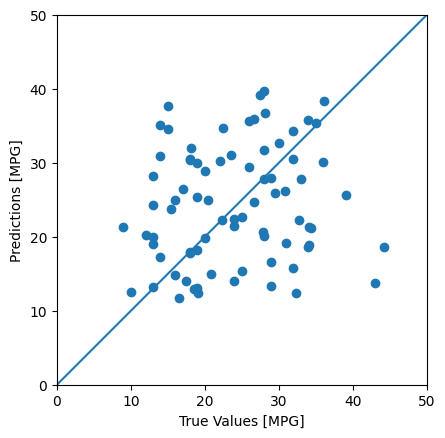

In [ ]:
# ## Visualizing Model Predictions vs. True Values with Matplotlib
# - **Library Used:** matplotlib.pyplot (`plt`) is used for creating static, animated, and interactive visualizations in Python.
# - **Code Explanation:**
#   - `test_predictions = model.predict(test_ds).flatten()`: Uses the trained Keras model to predict MPG values on the test dataset (`test_ds`). The `.flatten()` method converts the predictions to a 1D array for easier plotting.
#   - `a = plt.axes(aspect='equal')`: Creates a new matplotlib axes object with equal aspect ratio, ensuring that one unit on the x-axis is equal to one unit on the y-axis.
#   - `plt.scatter(test_labels, test_predictions)`: Creates a scatter plot of the true MPG values (`test_labels`) vs. the predicted MPG values (`test_predictions`).
#   - `plt.xlabel('True Values [MPG]')` and `plt.ylabel('Predictions [MPG]')`: Set the labels for the x-axis and y-axis, respectively.
#   - `lims = [0, 50]`: Defines the limits for both axes, from 0 to 50.
#   - `plt.xlim(lims)` and `plt.ylim(lims)`: Set the limits for the x-axis and y-axis using the `lims` list.
#   - `_ = plt.plot(lims, lims)`: Plots a diagonal reference line (y = x) to help visually assess how close predictions are to the true values. Points on this line represent perfect predictions.

test_predictions = model.predict(test_ds).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Show Model Prediction Output

In [ ]:
# ## Creating a DataFrame for Model Predictions and True Values
# - **Library Used:** pandas (`pd.DataFrame`)
# - **Purpose:** This block creates a DataFrame to store both the model's predicted values and the actual target values for the test set, enabling easy comparison and further analysis.
# - **Line-by-Line Explanation:**
#   - `model_pred_outputs = {...}`: Constructs a dictionary with two keys:
#       - `"pred"`: Contains the predicted values from the model (`test_predictions`).
#       - `"actual_value"`: Contains the true target values (`test_labels`).
#   - `model_output_df = pd.DataFrame(model_pred_outputs)`: Converts the dictionary into a pandas DataFrame, where each row corresponds to a test sample and columns represent predictions and actual values.
# - **Key Parameters:**
#   - `pd.DataFrame(data)`: The `data` parameter is a dictionary where keys become column names and values are array-like objects of equal length.
#

model_pred_outputs = {
    "pred": test_predictions,
    "actual_value": test_labels,
}
model_output_df = pd.DataFrame(model_pred_outputs)

In [57]:
model_output_df.head()

,pred,actual_value
0,34.652225,15.0
1,12.584548,10.0
2,21.381609,9.0
3,15.341971,25.0
4,18.243296,19.0


## 2. Model Evaluation 

### Preparing Regression Output for Binary Scoring Model Evaluation

- Create binary label for mileage prediction over 25 miles per gallon
    - 0 = Not Fuel Efficient, < 25 MPG
    - 1 = Fuel Efficient >= 25 MPG

In [58]:
# ## Converting Regression Output to Binary Classification Output
# - **Library Used:** pandas (`pd.DataFrame`, `.apply`, `lambda`)
# - **Purpose:** This block demonstrates how to convert continuous regression predictions and actual values into binary classification labels based on a threshold (25 MPG).
# - **Line-by-Line Explanation:**
#   - `model_output_df['score'] = model_output_df['pred'].apply(lambda x: 1 if x>=25 else 0)`: Creates a new column 'score' in the DataFrame, assigning 1 if the predicted MPG is greater than or equal to 25 (fuel efficient), otherwise 0.
#   - `model_output_df['label_value'] = model_output_df['actual_value'].apply(lambda x: 1 if x>=25 else 0)`: Creates a new column 'label_value', assigning 1 if the actual MPG is greater than or equal to 25, otherwise 0.
#   - `model_output_df.head()`: Displays the first few rows of the DataFrame to verify the new binary columns.
# - **Key Parameters:**
#   - `apply`: Applies a function along the axis of the DataFrame.
#   - `lambda x: ...`: Anonymous function to perform thresholding.
#

# Convert Regression Output to binary classification output
model_output_df.head()

,pred,actual_value
0,34.652225,15.0
1,12.584548,10.0
2,21.381609,9.0
3,15.341971,25.0
4,18.243296,19.0


In [60]:
# ## Converting Regression Output to Binary Classification Labels
# - **Library Used:** pandas (`pd.DataFrame`, `.apply`, `lambda`)
# - **Purpose:** This block defines a function to convert continuous regression predictions and actual values into binary classification labels based on a threshold (25 MPG).
# - **Line-by-Line Explanation:**
#   - `df['score'] = df[pred_field].apply(lambda x: 1 if x>=25 else 0 )`: Creates a new column 'score' in the DataFrame, assigning 1 if the predicted MPG is greater than or equal to 25 (fuel efficient), otherwise 0.
#   - `df['label_value'] = df[actual_field].apply(lambda x: 1 if x>=25 else 0)`: Creates a new column 'label_value', assigning 1 if the actual MPG is greater than or equal to 25, otherwise 0.
#   - `return df`: Returns the modified DataFrame with the new binary columns.
# - **Key Parameters:**
#   - `pred_field`: The column name for predicted values.
#   - `actual_field`: The column name for actual target values.
#   - `apply`: Applies a function along the axis of the DataFrame.
#   - `lambda x: ...`: Anonymous function to perform thresholding.


def convert_to_binary(df, pred_field, actual_field):
    df['score'] = df[pred_field].apply(lambda x: 1 if x>=25 else 0 )
    df['label_value'] = df[actual_field].apply(lambda x: 1 if x>=25 else 0)
    return df

In [61]:
binary_df = convert_to_binary(model_output_df, 'pred', 'actual_value')
binary_df.head()

,pred,actual_value,score,label_value
0,34.652225,15.0,1,0
1,12.584548,10.0,0,0
2,21.381609,9.0,0,0
3,15.341971,25.0,0,1
4,18.243296,19.0,0,0


### Classification Common Model Evaluation Metrics

In [64]:
# ## Importing Classification and Scoring Metrics from scikit-learn
# - **Library Used:** scikit-learn (`sklearn.metrics`)
# - **Purpose:** This block imports several key functions for evaluating classification models.
# - **Line-by-Line Explanation:**
#   - `brier_score_loss`: Computes the Brier score, a metric for the accuracy of probabilistic predictions.
#   - `accuracy_score`: Calculates the fraction of correct predictions (accuracy).
#   - `f1_score`: Computes the F1 score, the harmonic mean of precision and recall.
#   - `classification_report`: Generates a text summary of the precision, recall, F1 score, and support for each class.
#   - `roc_auc_score`: Computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
#   - `roc_curve`: Computes the ROC curve, plotting the true positive rate against the false positive rate at various threshold settings.
# - **Key Parameters:**
#   - All functions typically require arrays of true labels and predicted labels or probabilities as input.
#   - Some functions (like `f1_score`) allow you to specify the averaging method (e.g., 'weighted', 'macro', 'micro').
#

from sklearn.metrics import brier_score_loss, accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve

In [65]:
# ## Generating a Classification Report with scikit-learn
# - **Library Used:** scikit-learn (`sklearn.metrics.classification_report`)
# - **Purpose:** This block generates a detailed classification report for the binary classification results, summarizing the precision, recall, F1-score, and support for each class.
# - **Line-by-Line Explanation:**
#   - `classification_report(y_true, y_pred)`: Computes and returns a text summary of the main classification metrics.
#       - `y_true`: Array of true binary labels (here, `binary_df['label_value']`).
#       - `y_pred`: Array of predicted binary labels (here, `binary_df['score']`).
# - **Key Parameters:**
#   - `target_names`: (optional) List of label names to include in the report.
#   - `output_dict`: (optional) If True, returns the report as a dict instead of a string.
#   - `zero_division`: (optional) Sets the value to use when there is a zero division.
#
print(classification_report(binary_df['label_value'], binary_df['score']))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        41
           1       0.57      0.54      0.56        37

    accuracy                           0.59        78
   macro avg       0.59      0.59      0.59        78
weighted avg       0.59      0.59      0.59        78



In [66]:
#F1
f1_score(binary_df['label_value'], binary_df['score'], average='weighted')

0.5889295889295889

In [67]:
#AUC - area under the ROC curve
roc_auc_score(binary_df['label_value'], binary_df['score'])

np.float64(0.5873434410019777)

### Brier Score

In [68]:
random_predictions = np.random.random((100))
random_predictions

array([0.4938315 , 0.47346054, 0.99254235, 0.7550371 , 0.52183829,
       0.18807181, 0.32597652, 0.70331349, 0.63166856, 0.59886495,
       0.17127281, 0.46628788, 0.90990449, 0.9847845 , 0.57302374,
       0.40236291, 0.5388756 , 0.94541976, 0.21774812, 0.70464659,
       0.21166537, 0.3096136 , 0.97992678, 0.01832682, 0.63098265,
       0.84256004, 0.06465892, 0.77593387, 0.48618096, 0.46628042,
       0.36648762, 0.15586391, 0.88811754, 0.85837308, 0.42824878,
       0.40732922, 0.19588309, 0.13545053, 0.21678235, 0.14546894,
       0.05212741, 0.29699196, 0.39953844, 0.32969412, 0.0913566 ,
       0.63224732, 0.14849336, 0.09451651, 0.67600769, 0.54171496,
       0.33243554, 0.87522365, 0.45228388, 0.30674862, 0.39983212,
       0.92340138, 0.75365047, 0.99729774, 0.36025552, 0.1884155 ,
       0.08114103, 0.869844  , 0.35952798, 0.00671598, 0.74957978,
       0.8622186 , 0.56526758, 0.34476097, 0.03225915, 0.34885339,
       0.9880843 , 0.0313409 , 0.61670686, 0.76481167, 0.78812

In [69]:
random_labels = np.random.choice([0, 1], 100)
random_labels

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0])

- Convert probability to binary predictions

In [70]:
probability_prediction_df = pd.DataFrame({"prob_prediction": random_predictions,
                "binary_prediction": np.array([ 1 if abs(x)>=0.5 else 0 for x in random_predictions], dtype=int),
                                "label": random_labels})

In [ ]:
probability_prediction_df.head()

In [71]:
y_true = probability_prediction_df['label'].values
y_pred = probability_prediction_df['binary_prediction'].values

In [72]:
acc = accuracy_score(y_true, y_pred)
print(acc)

0.5


In [73]:
bs_loss = brier_score_loss(y_true, probability_prediction_df['prob_prediction'])
print(bs_loss)

0.32708520260861884


### Misclassified

In [74]:
missclassified_df = probability_prediction_df[probability_prediction_df['binary_prediction']!=probability_prediction_df['label']]

<Axes: ylabel='Frequency'>

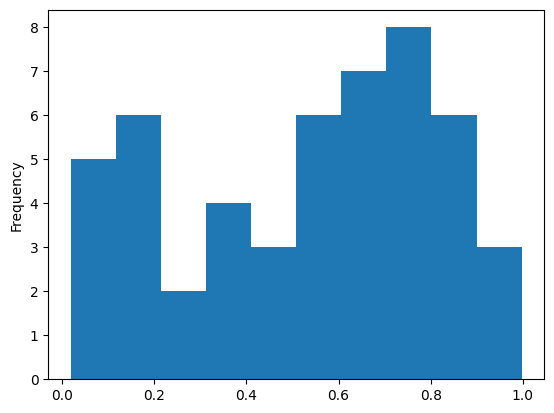

In [75]:
missclassified_df['prob_prediction'].plot(kind='hist')

## 3. Demographic Group Bias Analysis

- Select groups to analyze
- Prepare data 
- Analyze groups


### Select groups to analyze
- Selected 'origin' field which gives the country of origin for the car.

In [76]:
#combine binary df with original test df, order was not shuffled so can do

In [77]:
merged_binary_df = binary_df.assign(origin = test_data['Origin'].values)

In [78]:
merged_binary_df.head()

,pred,actual_value,score,label_value,origin
0,34.652225,15.0,1,0,USA
1,12.584548,10.0,0,0,USA
2,21.381609,9.0,0,0,USA
3,15.341971,25.0,0,1,Japan
4,18.243296,19.0,0,0,USA


### Prepare Data

In [80]:
# Aequitas
!pip install aequitas
from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
from aequitas.plotting import Plot
from aequitas.bias import Bias
from aequitas.fairness import Fairness

INFO: pip is looking at multiple versions of aequitas to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.8/727.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.4 MB/s eta 0:00:00
  DEPRECATION: Building 'Flask-Bootstrap' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the s

In [83]:
# ## Preparing Data for Aequitas Fairness and Bias Analysis
# - **Library Used:** Aequitas (https://github.com/dssg/aequitas) is a bias and fairness audit toolkit for machine learning models.
# - **Line-by-Line Explanation:**
#   - `ae_df, _ = preprocess_input_df(merged_binary_df)`: Preprocesses the merged DataFrame into the format required by Aequitas, extracting relevant columns and formatting them for group analysis.
#   - `g = Group()`: Instantiates the `Group` class from Aequitas, which is used to compute group metrics.
#   - `xtab, _ = g.get_crosstabs(ae_df)`: Computes crosstabs (group metrics) for the preprocessed DataFrame, returning a DataFrame with metrics like TPR, FPR, etc., for each group.
#   - `absolute_metrics = g.list_absolute_metrics(xtab)`: Lists all absolute metrics calculated in the crosstab DataFrame.
#   - `clean_xtab = xtab.fillna(-1)`: Fills any missing values (NaN) in the crosstab DataFrame with -1 for easier plotting and analysis.
#   - `aqp = Plot()`: Instantiates the `Plot` class from Aequitas for visualizing group metrics.
#   - `b = Bias()`: Instantiates the `Bias` class from Aequitas, which can be used for bias analysis and reporting.
#

ae_df, _ = preprocess_input_df(merged_binary_df)
g = Group()
xtab, _ = g.get_crosstabs(ae_df)
absolute_metrics = g.list_absolute_metrics(xtab)
clean_xtab = xtab.fillna(-1)
aqp = Plot()
b = Bias()

### Analyze Groups

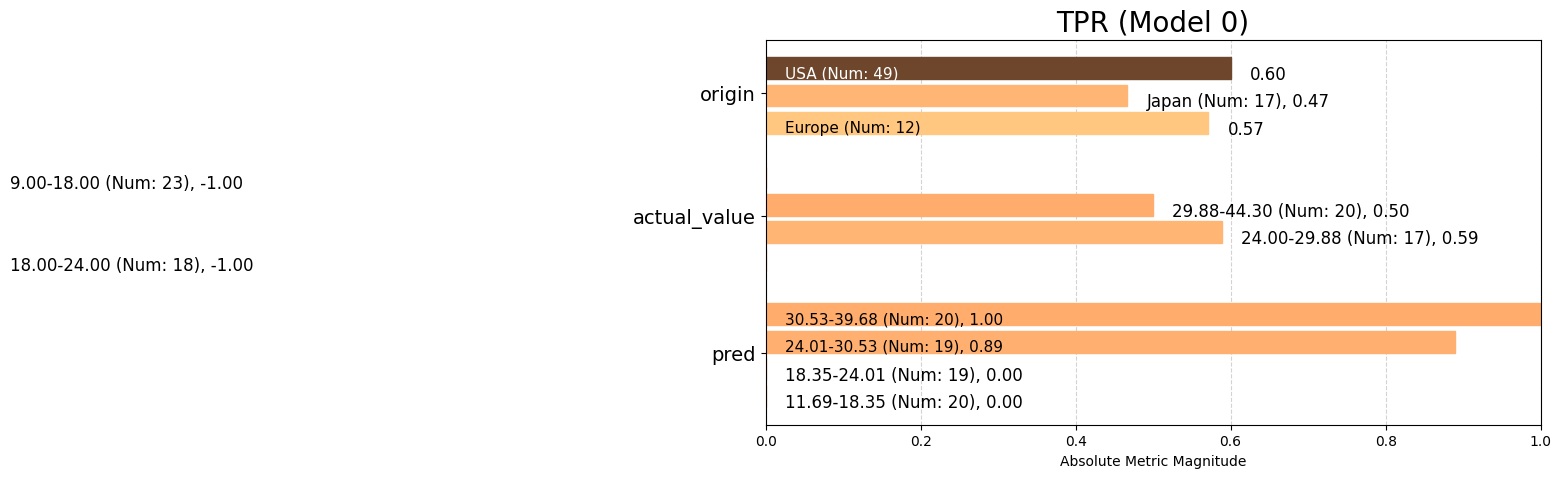

In [86]:
# ## Visualizing True Positive Rate (TPR) by Group with Aequitas
# - **Library Used:** Aequitas (https://github.com/dssg/aequitas) is a toolkit for auditing bias and fairness in machine learning models.
# - **Code Explanation:**
#   - `aqp.plot_group_metric(clean_xtab, 'tpr', min_group_size=0.05)`: Plots the True Positive Rate (TPR) for each group in the data.
#       - `clean_xtab`: The crosstab DataFrame containing group metrics, with missing values filled.
#       - `'tpr'`: The metric to plot, here the True Positive Rate.
#       - `min_group_size=0.05`: Only groups with at least 5% of the total population are included in the plot.
# - **Key Parameters:**
#   - `clean_xtab`: DataFrame with group metrics.
#   - `metric`: String specifying which metric to plot (e.g., 'tpr').
#   - `min_group_size`: Minimum fraction of total entities for a group to be included in the plot.
#
tpr = aqp.plot_group_metric(clean_xtab, 'tpr', min_group_size=0.05)

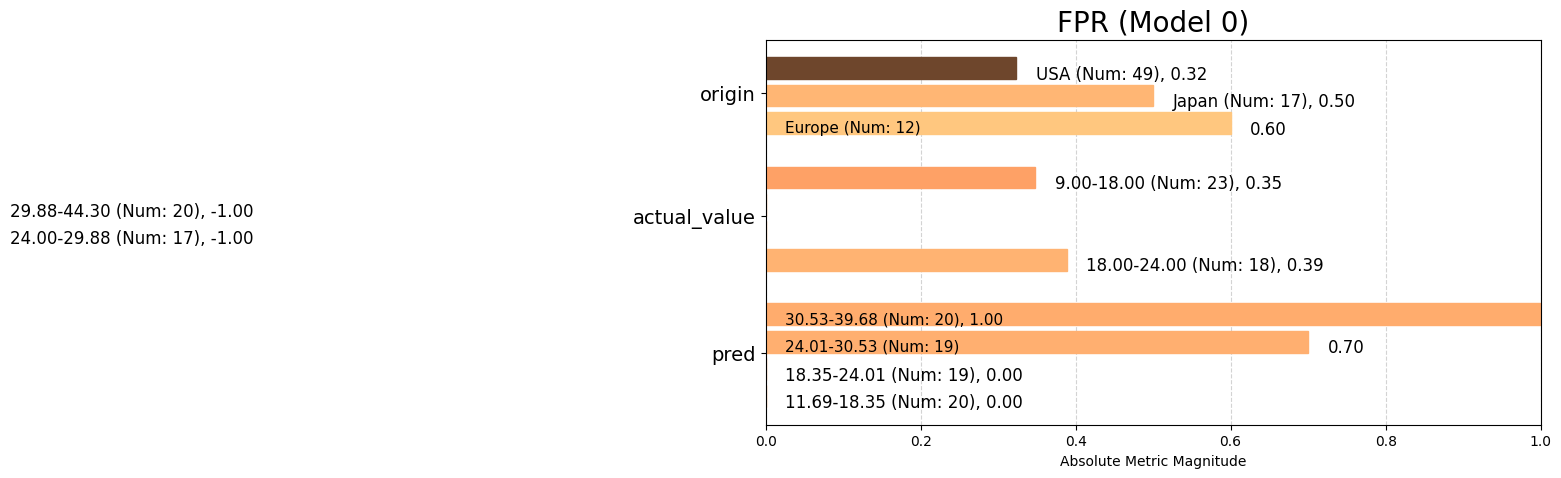

In [87]:
# ## Visualizing False Positive Rate (FPR) by Group with Aequitas
# - **Library Used:** Aequitas (https://github.com/dssg/aequitas) is a toolkit for auditing bias and fairness in machine learning models.
# - **Code Explanation:**
#   - `aqp.plot_group_metric(clean_xtab, 'fpr', min_group_size=0.05)`: Plots the False Positive Rate (FPR) for each group in the data.
#       - `clean_xtab`: The crosstab DataFrame containing group metrics, with missing values filled.
#       - `'fpr'`: The metric to plot, here the False Positive Rate.
#       - `min_group_size=0.05`: Only groups with at least 5% of the total population are included in the plot.
# - **Key Parameters:**
#   - `clean_xtab`: DataFrame with group metrics.
#   - `metric`: String specifying which metric to plot (e.g., 'fpr').
#   - `min_group_size`: Minimum fraction of total entities for a group to be included in the plot.
#
fpr = aqp.plot_group_metric(clean_xtab, 'fpr', min_group_size=0.05)

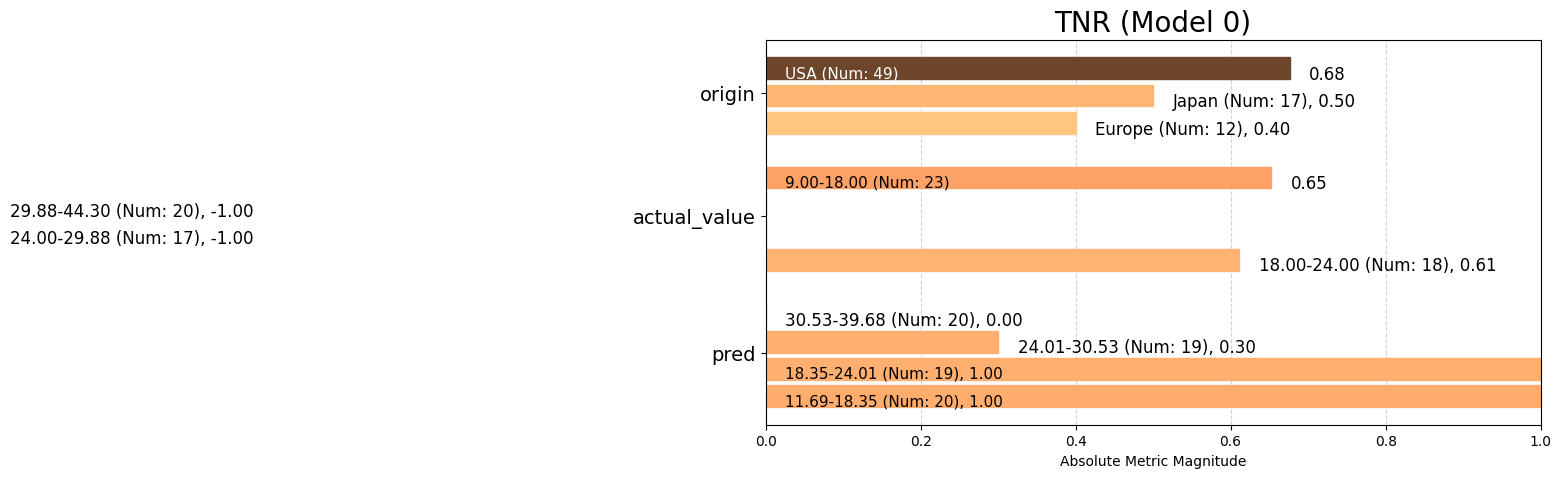

In [88]:
# ## Visualizing True Negative Rate (TNR) by Group with Aequitas
tnr = aqp.plot_group_metric(clean_xtab, 'tnr', min_group_size=0.05)

In [ ]:
# ## Generating a Bias and Fairness Report with Aequitas
# - **Library Used:** Aequitas (http://aequitas.dssg.io/) is an open-source bias and fairness audit toolkit for machine learning models.
# - **Purpose:** This block is intended to generate a bias and fairness report for the model's predictions using the Aequitas library.
# - **How it Works:**
#   - The code below is a placeholder for generating a bias report, which typically involves using Aequitas to analyze model predictions and group metrics.
#   - Aequitas provides functions to preprocess input data, compute group metrics, and visualize or export fairness and bias reports.
# - **Key Parameters:**
#   - Input DataFrame: Should include columns for predicted scores, actual labels, and group membership (e.g., 'origin').
#   - Metrics: Aequitas computes metrics such as TPR (True Positive Rate), FPR (False Positive Rate), and others for each group.
#   - Visualization: Aequitas can generate plots and HTML reports for further analysis.
#

# Bias Report - http://aequitas.dssg.io/audit/eg1cp7ku/adult_rf_binary/

## 4. Train Uncertainty Estimation Model with TF Probability

### Instructions
- Using MPG model from earlier, create uncertainty estimation model with TF Probability.
- In particular, we will focus on building a model that accounts for Aleatoric Uncertainty.

In [94]:
!pip install --upgrade tensorflow tensorflow_probability
!pip install "tensorflow-probability[tf]"
import tensorflow_probability as tfp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.7 MB/s eta 0:00:00 0:00:01


### Aleatoric Uncertainty
- Known Unknowns
- 2 Main Changes to our network 
    - Add a second unit to the last dense layer before passing it to Tensorflow Probability layer to model for the predictor y and the heteroscedasticity or unequal scattering of data
    - DistributionLambda distribution mean and std
- DistributionLambda is a special Keras layer that uses a Python lambda to construct a distribution based on the layer inputs and the output of the final layer of the model is passed into the loss function. Lastly. this model will return a distribution for both mean and standard deviation.

In [95]:
# ## Statistical Summary of Training Labels
train_label_stats = train_labels.describe()
train_label_stats

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [96]:
# ## Building a Probabilistic Regression Model with TensorFlow Probability
# - **Library Used:** TensorFlow Probability (`tensorflow_probability` or `tfp`) is an open-source library for probabilistic reasoning and statistical analysis in TensorFlow. It provides tools for building models that output probability distributions, enabling uncertainty estimation in predictions.
# - **Explanation of Code Block:**
#   - `def build_seq_prob_model(feature_layer):`
#     Defines a function to build a Keras Sequential model for probabilistic regression.
#   - `feature_layer`: The input feature transformation layer (e.g., DenseFeatures or preprocessing model).
#   - `tf.keras.layers.Dense(150, activation='relu')` and `tf.keras.layers.Dense(75, activation='relu')`:
#     Add two hidden dense layers with ReLU activation for feature extraction.
#   - `tf.keras.layers.Dense(1 + 1)`:
#     Outputs two values per sample: one for the predicted mean and one for the predicted standard deviation (aleatoric uncertainty).
#   - `tfp.layers.DistributionLambda(...)`:
#     Wraps the output into a probabilistic distribution. Here, it creates a Normal distribution with:
#       - `loc=t[..., :1]`: The mean of the distribution (first output).
#       - `scale=1e-3 + tf.math.softplus(0.1 * t[...,1:])`: The standard deviation, transformed to ensure positivity and numerical stability.
#   - `def build_prob_model(train_ds, feature_layer, epochs=5, loss_metric='mse'):`
#     Defines a function to compile and train the probabilistic model.
#   - `negloglik = lambda y, rv_y: -rv_y.log_prob(y)`:
#     Defines the negative log-likelihood loss for probabilistic regression.
#   - `model.compile(...)`:
#     Compiles the model with the Adam optimizer, negative log-likelihood loss, and an additional metric (default: 'mse').
#   - `model.fit(train_ds, epochs=epochs)`:
#     Trains the model on the provided dataset for the specified number of epochs.
# - **Key Parameters:**
#   - `feature_layer`: Input transformation layer for features.
#   - `epochs`: Number of training epochs.
#   - `loss_metric`: Additional metric to monitor during training.
#   - `DistributionLambda`: Used to output a distribution instead of a point estimate.
#
def build_seq_prob_model(feature_layer):
    model = tf.keras.Sequential([
        feature_layer,
        tf.keras.layers.Dense(150, activation='relu'),
        tf.keras.layers.Dense(75, activation='relu'),
        tf.keras.layers.Dense(1 + 1),
        tfp.layers.DistributionLambda(
            lambda t:tfp.distributions.Normal(
                loc=t[..., :1],
                scale=1e-3 + tf.math.softplus(0.1 * t[...,1:])

            )
         )



    ])
    return model

def build_prob_model(train_ds,   feature_layer,  epochs=5, loss_metric='mse'):
    model = build_seq_prob_model(feature_layer)
    negloglik = lambda y, rv_y: -rv_y.log_prob(y)
    loss = negloglik
    model.compile(tf.optimizers.Adam(learning_rate=0.05), loss=loss, metrics=[loss_metric])
    history = model.fit(train_ds,
                        epochs=epochs)
    return model, history

### Train Probability Model

In [104]:
import tensorflow_probability as tfp

def build_prob_model(train_ds, preprocessing_model, epochs=5, loss_metric='mse'):
    inputs = preprocessing_model.input
    x = preprocessing_model.output
    x = tf.keras.layers.Dense(150, activation='relu')(x)
    x = tf.keras.layers.Dense(75, activation='relu')(x)
    x = tf.keras.layers.Dense(2)(x)  # 2 outputs: mean and stddev
    outputs = tfp.layers.DistributionLambda(
        lambda t: tfp.distributions.Normal(
            loc=t[..., :1],
            scale=1e-3 + tf.math.softplus(0.1 * t[..., 1:])
        )
    )(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    negloglik = lambda y, rv_y: -rv_y.log_prob(y)
    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.05),
        loss=negloglik,
        metrics=[loss_metric]
    )
    history = model.fit(train_ds, epochs=epochs)
    return model, history

prob_model, history = build_prob_model(train_ds, preprocessing_model, epochs=500)

ValueError: Exception encountered when calling layer 'distribution_lambda_2' (type DistributionLambda).

A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


Call arguments received by layer 'distribution_lambda_2' (type DistributionLambda):
  • inputs=<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_19>
  • args=<class 'inspect._empty'>
  • kwargs={'training': 'None'}

### Extract Mean and Standard Deviation Output

In [105]:
feature_column_list = categorical_feature_list + numerical_feature_list
x_tst = dict(test_data[feature_column_list])
yhat = prob_model(x_tst)
prob_preds = prob_model.predict(test_ds)
m = yhat.mean()
s = yhat.stddev()

NameError: name 'prob_model' is not defined

In [106]:
m[0:10]

NameError: name 'm' is not defined

In [ ]:
s[0:10]

In [ ]:
prob_outputs = {
    "pred": prob_preds.flatten(),
    "actual_value": test_data['MPG'].values,
    "pred_mean": m.numpy().flatten(),
    "pred_std": s.numpy().flatten()
}
prob_output_df = pd.DataFrame(prob_outputs)

In [ ]:
prob_output_df.head()

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, m.numpy().flatten())
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


## 5. Model Interpretability with Shapley Values

- Using Open Source Library Shap - https://github.com/slundberg/shap
- Developed by Su-In Lee's lab at the University of Washington, and Microsoft Research

In [ ]:
# adapted from https://github.com/kweinmeister/notebooks/blob/master/tensorflow-shap-college-debt.ipynb
# https://towardsdatascience.com/understand-how-your-tensorflow-model-is-making-predictions-d0b3c7e88500

In [ ]:
import shap
shap.initjs()

### Train Model without Dense Features

In [ ]:
def build_shap_model( num_features):
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[num_features]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [ ]:
shap_num_features = len( numerical_feature_list)
shap_feature_columns =  tf_numerical_feature_list
#shap_feature_layer = tf.keras.layers.DenseFeatures(shap_feature_columns)
shap_model = build_shap_model( shap_num_features)

In [ ]:
EPOCHS = 1000
early_stop = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=10)
shap_history = shap_model.fit( normed_train_data, train_labels,  callbacks=[early_stop], epochs=EPOCHS,  verbose=1)

### Use KMeans to Summarize Dataset

In [ ]:
df_train_normed_summary = shap.kmeans(normed_train_data.values, 25)


In [ ]:
# Instantiate an explainer with the model predictions and training data summary
explainer = shap.KernelExplainer(shap_model.predict, df_train_normed_summary)

In [ ]:
# `ipywidgets` may need to be installed to see status visualization.
# Please uncomment these two lines:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

# And restart the kernel and run the notebook after installing the ipwidgets.
# From the top menu, click `Kernel` -> `Restart & Run All`

In [ ]:
# Extract Shapley values from the explainer
shap_values = explainer.shap_values(normed_train_data.values)

In [ ]:
# Summarize the Shapley values in a plot
shap.summary_plot(shap_values[0], normed_train_data)

In [ ]:
INSTANCE_NUM = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][INSTANCE_NUM], normed_train_data.iloc[INSTANCE_NUM,:])

In [ ]:
# Plot the SHAP values for multiple instances
NUM_ROWS = 10
shap.force_plot(explainer.expected_value[0], shap_values[0][0:NUM_ROWS], normed_train_data.iloc[0:NUM_ROWS])